# Implementing a Perceptron

### Perceptron is a fundamental unit of the neural network which takes weighted inputs, process it and capable of performing binary classifications

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [250]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
   """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
            Parameters
            ----------
            X : {array-like}, shape = [n_examples, n_features]
                Training vectors, where n_examples is the number of
                examples and n_features is the number of features.
            
            y : array-like, shape = [n_examples]
                Target values.
            
            Returns
            -------
            self : object
            """
        rng =  np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for feature, target in zip(X, y):
                update = self.eta * (target - self.predict(feature))
                self.w_[1:] += update * feature
                self.w_[0] += update # bias unit1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    
    def net_input(self, X):
        '''Calculate the net input '''
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [224]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [0,2]]

y = iris.target[:100]
y = np.where(y == 0, -1, 1)

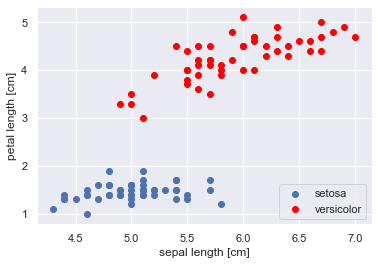

In [241]:
# plot the sepal length against the sepal width
plt.scatter(X[:50, 0], X[:50, 1], label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], label='versicolor', color='red')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='lower right')
plt.show()

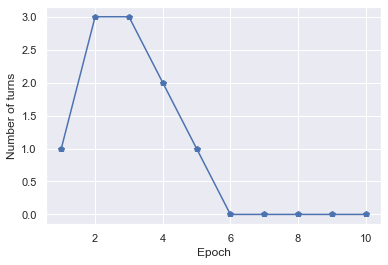

In [275]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, 'pb')
plt.xlabel('Epoch')
plt.ylabel('Number of turns')

plt.show()